In [1]:
import seaborn as sns
import os 
import pandas as pd

In [10]:
list_of_results = []
# loop through all dirs in results
base_path = "results/emails/"
for net_dir in os.listdir(base_path):

    path = os.path.join(base_path, net_dir)

    if net_dir == '.DS_Store': continue

    # loop through all files in dir
    for dim_dir in os.listdir(path):

        dim_path = os.path.join(path, dim_dir) 

        if dim_dir == '.DS_Store': continue

        if dim_dir == 'results':

            for result_file in os.listdir(dim_path):
                if result_file == '.DS_Store':
                    continue
                result_path = os.path.join(dim_path, result_file)
                
                # load results
                df = pd.read_csv(result_path, header=None)
                # add to list
                list_of_results.append([net_dir, dim_dir, df.values.T[0][1]])

In [11]:
df = pd.DataFrame(list_of_results, columns=['network', 'dimension', 'divergence_score'])


In [12]:
df

,network,dimension,divergence_score
0,dim_16,results,0.025573
1,dim_16,results,0.016399
2,dim_16,results,0.019453
3,dim_16,results,0.018207
4,dim_16,results,0.017148
...,...,...,...
175,dim_64,results,0.022116
176,dim_64,results,0.024554
177,dim_64,results,0.025316
178,dim_64,results,0.022339


<Axes: xlabel='network', ylabel='divergence_score'>

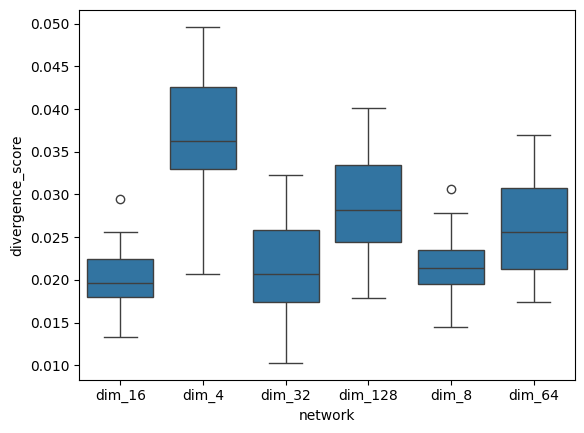

In [13]:
# box plot of mouse brain net, hue by dimension
sns.boxplot(x='network', y='divergence_score',data=df)
# specify the order of the hue

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='dimension', ylabel='divergence_score'>

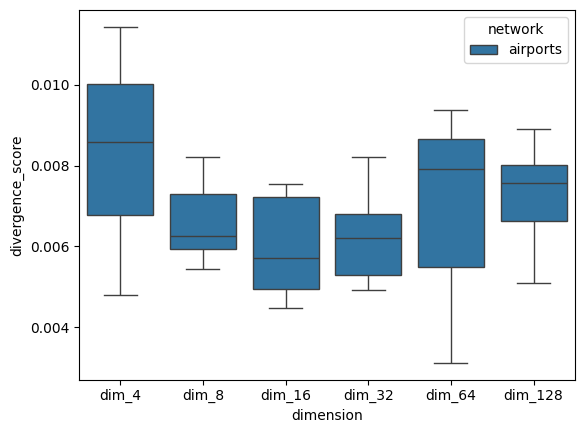

In [8]:
# airports
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'airports'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='dimension', ylabel='divergence_score'>

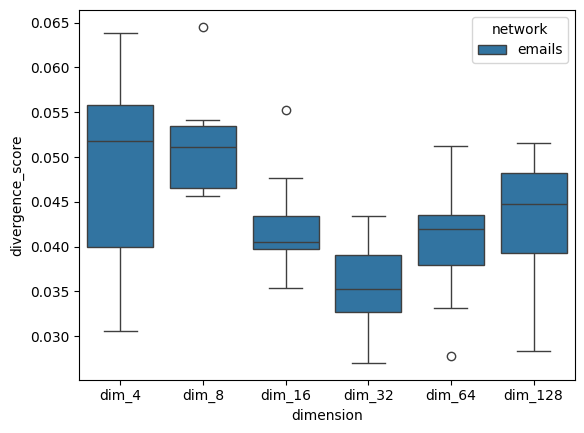

In [9]:
# emails 
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'emails'])